#### start with importing libraries

In [24]:
import pandas as pd
import numpy as np
import sklearn as skit
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling as PandasReport
import seaborn as sns
from scipy.stats import kurtosis, skew
from scipy import stats
sns.set(color_codes=True)
print("Setup Complete")

Setup Complete


#### read the data

In [3]:
df = pd.read_csv("wine-reviews.csv")
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [4]:
df.shape

(129971, 14)

In [5]:
df.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


#### this describe that there only 3 numerical table
#### points need to observe are as follows: 
#### 1. The variance( the spread between numbers in a data set.) in points is much less than price.
#### 2. In points all point lies btw 80 to 100
#### 3. Prices of wine has huge range starting from 4 to 2300
#### 4.In prices, the IQR (Interquartile Range) is 25. Whereas the max value is 3300

In [6]:
df.isnull().values.any()

True

In [7]:
df.isnull()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,False,False,False,False,False,True,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,True,True,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,False,False,False,False,False,False,False,True,True,False,True,False,False,False
129967,False,False,False,True,False,False,False,False,False,False,False,False,False,False
129968,False,False,False,False,False,False,False,False,True,False,False,False,False,False
129969,False,False,False,True,False,False,False,False,True,False,False,False,False,False


<AxesSubplot:>

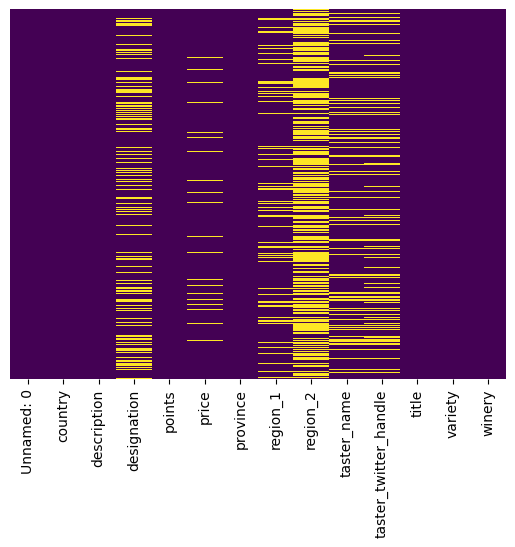

In [10]:
sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [13]:
df1 = df.drop(columns=['Unnamed: 0','designation','region_1','region_2','taster_twitter_handle'])


<AxesSubplot:>

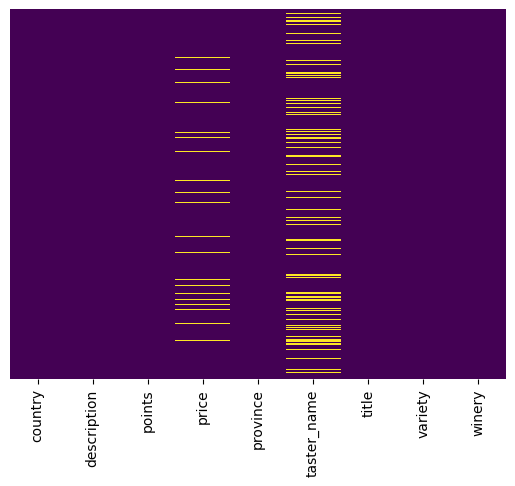

In [15]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

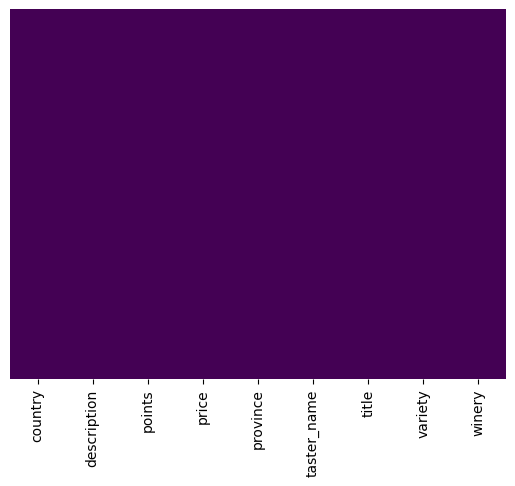

In [21]:
df1.price.fillna(df.price.dropna().median(),inplace=True)
wine1=df1.dropna()
sns.heatmap(wine1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### outlier

<AxesSubplot:xlabel='price'>

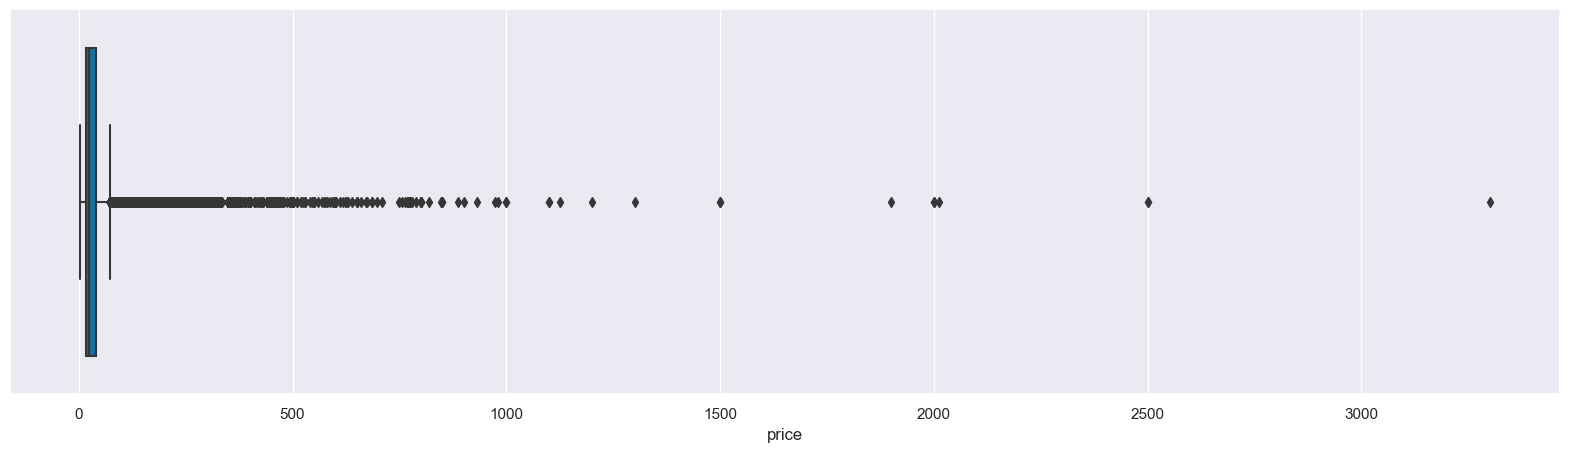

In [31]:
plt.figure(figsize=(20,5))
sns.boxplot(x=df1['price'], palette='colorblind')

<AxesSubplot:xlabel='price'>

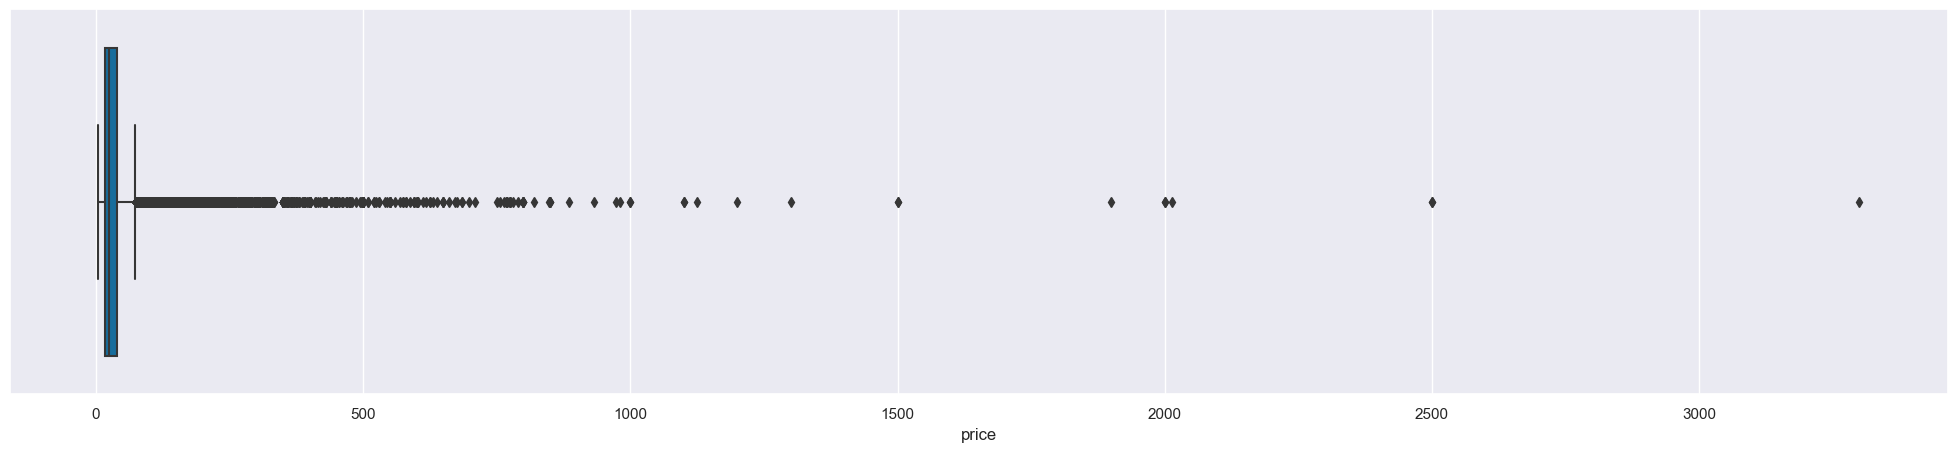

In [33]:
plt.figure(figsize=(25,5))
sns.boxplot(x=wine1['price'],palette='colorblind')

<AxesSubplot:xlabel='points'>

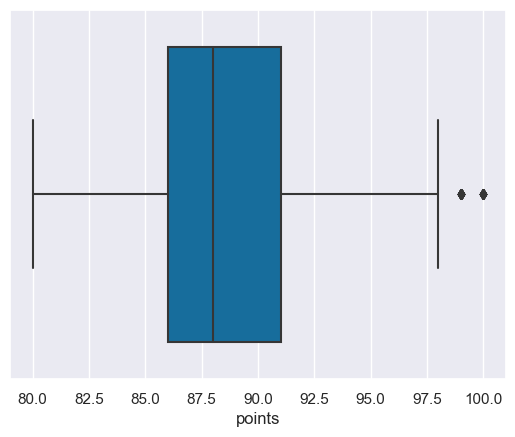

In [38]:

sns.boxplot(x=df['points'],palette='colorblind')

we can see 2 point of outlier but, they cannot be said as outlier as maximum point can be 100